In [6]:
#imports

import tensorflow as tf 
from vit_keras import vit, utils
from keras_flops import get_flops
import cv2


In [7]:
#definicao dos diretorios

test_dir = r'C:\Users\Gabriel\OneDrive - Universidade de Tras-os-Montes e Alto Douro\UTAD\2020-2021\Pesquisa\Dataset\dataset_aumentado_todas\dataset_aumentado\test'
pesos = r"C:\Users\Gabriel\OneDrive - Universidade de Tras-os-Montes e Alto Douro\UTAD\2020-2021\Pesquisa\ViT - Experimentos\Experimento 0\model0.h5"

In [8]:
#definicao das configuracoes

image_size = 224
image_shape = (image_size, image_size, 3)
classes = 12

In [9]:
#carrega o modelo

xcp = tf.keras.applications.Xception(
    include_top=False,
    weights="imagenet",
    input_shape=image_shape,
    pooling='avg'
)

from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Flatten, Dropout, BatchNormalization, GlobalMaxPooling2D

x = Dense(512, activation='relu')(xcp.output)
x = Dropout(0.25)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.25)(x)
output = Dense(classes, activation='softmax')(x)
model = tf.keras.models.Model(xcp.input, output) 

model.load_weights(pesos)

In [10]:
#imprime os flops

flops = get_flops(model, batch_size=1)
print(f"FLOPS: {flops / 10 ** 9:.03} G")

Instructions for updating:
Use `tf.compat.v1.graph_util.tensor_shape_from_node_def_name`
FLOPS: 9.14 G


Notebook run using keras: 2.7.0
------------------------------------
90: 
Found 72 images belonging to 12 classes.
['Codega', 'Malvasia Fina', 'Malvasia Preta', 'Malvasia Rei', 'Moscatel Galego', 'Mourisco Tinto', 'Rabigato', 'Tinta Amarela', 'Tinta Barroca', 'Tinta Roriz', 'Tinto Cao', 'Touriga Nacional']
              precision    recall  f1-score   support

          CD       1.00      0.67      0.80         6
          MF       1.00      0.83      0.91         6
          MP       0.50      1.00      0.67         6
          MR       1.00      0.83      0.91         6
          MG       0.83      0.83      0.83         6
          MT       0.80      0.67      0.73         6
          RG       1.00      0.67      0.80         6
          TA       0.75      1.00      0.86         6
          TB       1.00      0.83      0.91         6
          TR       0.75      1.00      0.86         6
          TC       1.00      1.00      1.00         6
          TN       1.00      0.67      0.80

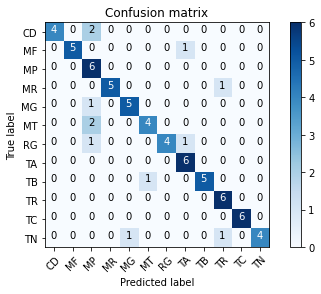

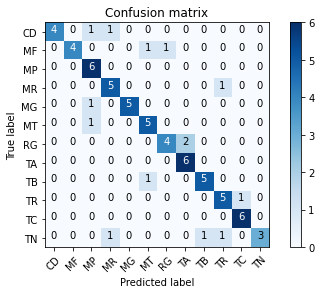

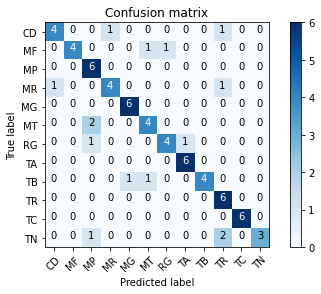

In [11]:
#matriz de confusao 
import os
import tensorflow.keras as keras
from tensorflow.keras.applications import inception_v3 as inc_net
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import decode_predictions
from skimage.io import imread
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from tensorflow.keras import backend as K
from sklearn import metrics
import itertools
print('Notebook run using keras:', keras.__version__)
import random

classes_dic ={
    'Codega':'CD',
    'Malvasia Fina':'MF',
    'Malvasia Preta':'MP',
    'Malvasia Rei':'MR',
    'Moscatel Galego':'MG',
    'Mourisco Tinto':'MT',
    'Rabigato':'RG',
    'Tinta Amarela':'TA',
    'Tinta Barroca':'TB',
    'Tinta Roriz':'TR',
    'Tinto Cao':'TC',
    'Touriga Nacional':'TN'
}

def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

def confusion_matrix(test_data_generator, model):
  test_data_generator.reset()
  predictions = model.predict(test_data_generator, steps=test_set.samples)
  # Get most likely class
  predicted_classes = np.argmax(predictions, axis=1)
  true_classes = test_data_generator.classes
  class_labels = list(test_data_generator.class_indices.keys())
  print(class_labels)
  class_labels = [classes_dic[x] for x in class_labels]  

  report = metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
  cm = metrics.confusion_matrix(true_classes, predicted_classes)
  print(report)
  plot_confusion_matrix(cm, class_labels)

rotates = [cv2.ROTATE_90_CLOCKWISE, cv2.ROTATE_180, cv2.ROTATE_90_COUNTERCLOCKWISE]
degrees = [90, 180, 270]
for i in range(len(rotates)):

    print('------------------------------------')
    print(str(degrees[i]) + ': ')
    def preprocessing(x):
        aux = cv2.rotate(x, rotates[i])
        aux = tf.keras.applications.xception.preprocess_input(aux)
        return aux
    
    test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=preprocessing)
    test_set = test_datagen.flow_from_directory(test_dir, 
                                                target_size=(image_size, image_size),
                                                class_mode='categorical',
                                                batch_size=1,
                                                shuffle=False)

    test_set.reset()
    confusion_matrix(test_set, model)
    